<a href="https://colab.research.google.com/github/Adithya280399/Adithya_INFO5731_Fall2025/blob/main/Suresh_Adithya_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

README.md: 0.00B [00:00, ?B/s]

sentiment/train-00000-of-00001.parquet:   0%|          | 0.00/3.78M [00:00<?, ?B/s]

sentiment/test-00000-of-00001.parquet:   0%|          | 0.00/901k [00:00<?, ?B/s]

sentiment/validation-00000-of-00001.parq(…):   0%|          | 0.00/167k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/45615 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/12284 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Train size: (45615, 2)
Val size: (2000, 2)
Test size: (12284, 2)
Train (train+val merged) {'negative': np.int64(7405), 'neutral': np.int64(21542), 'positive': np.int64(18668)}


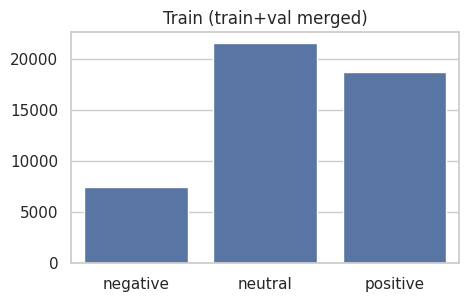

Test {'negative': np.int64(3972), 'neutral': np.int64(5937), 'positive': np.int64(2375)}


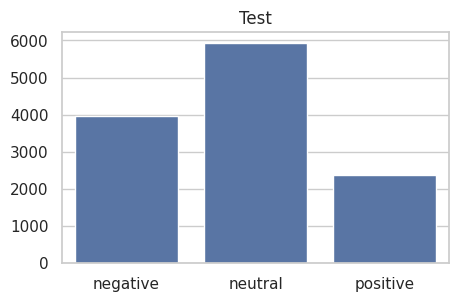


Sample negative: "I think aftr seeing all this #YakubToHang drama, the security guy at d jail would like to shoot Yakub dead rather than hanging him tomorrow"

Sample neutral: Murray gives something else for ASU D to think about.... This may help Allen as well....

Sample positive: "Man, George Harrison was my favorite Beatle. What a brilliant soul, may he R.i.p"


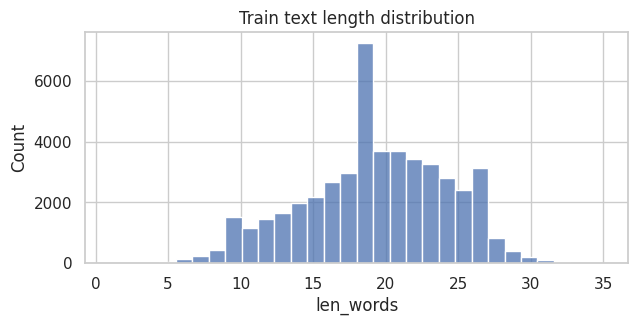

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


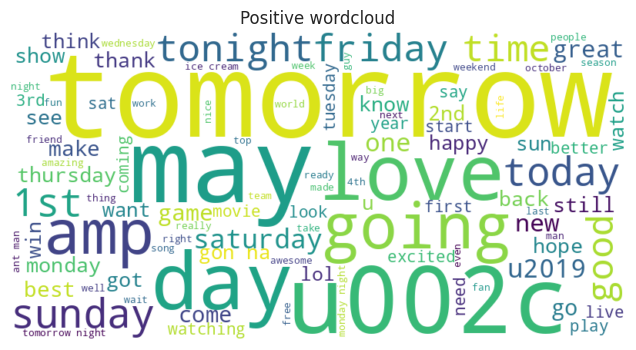

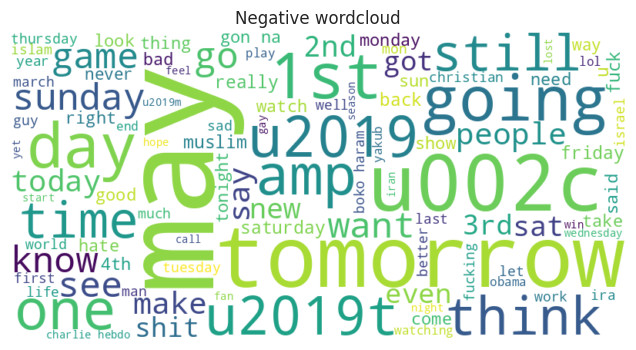


Top unigrams for negative:
['tomorrow', 'u002c', 'like', '1st', 'day', 'going', 'time', 'sunday', 'u2019t', '2nd']

Top unigrams for neutral:
['tomorrow', 'u002c', 'day', 'going', 'night', 'sunday', 'friday', '1st', 'time', 'like']

Top unigrams for positive:
['tomorrow', 'day', 'u002c', 'night', 'going', 'friday', 'good', 'time', 'sunday', 'love']
Train/Val shapes: (38092,) (9523,) (38092,) (9523,)
Train distribution: Counter({np.int64(1): 17234, np.int64(2): 14934, np.int64(0): 5924})
TF-IDF shapes: (38092, 20000) (9523, 20000)
After oversample: Counter({np.int64(2): 17234, np.int64(1): 17234, np.int64(0): 17234})
Running CV for LinearSVC (this may take a bit)...
SVC CV metrics: {'accuracy': 0.635093982988554, 'precision': 0.6070417341763665, 'recall': 0.6132022922821249, 'f1': 0.6098653335396321}
NB CV metrics: {'accuracy': 0.6186915887850467, 'precision': 0.6483571837279892, 'recall': 0.5132930042662966, 'f1': 0.51151228875871}


In [ ]:
# ---------------------------
# 0. Installs (run once in Colab)
# ---------------------------
# These installs are minimal: datasets (Hugging Face), transformers (for BERT), sentence-transformers for embeddings, xgboost.
# In Colab, avoid reinstalling numpy/scikit-learn to prevent ABI conflicts.
!pip install -q datasets transformers sentence-transformers xgboost imbalanced-learn wordcloud

# ---------------------------
# 1. Imports
# ---------------------------
import os, re, math, random
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from wordcloud import WordCloud

from datasets import load_dataset
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from collections import defaultdict
import joblib

# ---------------------------
# 2. Load dataset (TweetEval sentiment)
# ---------------------------
# This dataset has labels: 0 = negative, 1 = neutral, 2 = positive
ds = load_dataset("tweet_eval", "sentiment")
# Combine train + validation into training pool if you want
train_ds = ds["train"].to_pandas()
val_ds   = ds["validation"].to_pandas()
test_ds  = ds["test"].to_pandas()

# Quick look
print("Train size:", train_ds.shape)
print("Val size:", val_ds.shape)
print("Test size:", test_ds.shape)
train_ds.head()

# Combine train+val into a single training set (common in assignments)
df_train_full = pd.concat([train_ds, val_ds], ignore_index=True)
df_test = test_ds.copy()

# Map columns to 'text' and 'label' for convenience
df_train_full = df_train_full.rename(columns={"text":"text","label":"label"})
df_test = df_test.rename(columns={"text":"text","label":"label"})

# ---------------------------
# 3. EDA & class imbalance check
# ---------------------------
def show_class_dist(df, title=""):
    counts = df['label'].value_counts().sort_index()
    names = ['negative','neutral','positive']
    print(title, dict(zip(names, counts.values)))
    plt.figure(figsize=(5,3))
    sns.barplot(x=names, y=counts.values)
    plt.title(title)
    plt.show()

show_class_dist(df_train_full, "Train (train+val merged)")
show_class_dist(df_test, "Test")

# If class imbalance exists, we will handle it later (oversampling or class_weight).
# Show some sample tweets
print("\nSample negative:", df_train_full[df_train_full.label==0].text.sample(1).iloc[0])
print("\nSample neutral:", df_train_full[df_train_full.label==1].text.sample(1).iloc[0])
print("\nSample positive:", df_train_full[df_train_full.label==2].text.sample(1).iloc[0])

# Text length distribution
df_train_full['len_words'] = df_train_full['text'].str.split().apply(len)
plt.figure(figsize=(7,3)); sns.histplot(df_train_full['len_words'], bins=30); plt.title("Train text length distribution"); plt.show()

# ---------------------------
# 4. Preprocessing utilities (clean, tokenize, lemmatize)
# ---------------------------
# We'll use a light, fast cleaning pipeline (lowercase, remove URLs, mentions), and word-level tokens.
# For lemmatization we can either use spaCy or NLTK's WordNetLemmatizer.
# To keep installs small, use NLTK lemmatizer.
!pip install -q nltk
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text_simple(s):
    s = str(s)
    s = s.lower()
    s = re.sub(r'http\S+|www\.\S+', ' ', s)         # remove URLs
    s = re.sub(r'@\w+', ' ', s)                    # remove mentions
    s = re.sub(r'#[A-Za-z0-9_]+', ' ', s)          # remove hashtags (or keep)
    s = re.sub(r'[^a-z0-9\s]', ' ', s)             # remove punct
    s = re.sub(r'\s+', ' ', s).strip()
    return s

def preprocess_text(s, do_lemmatize=True, remove_stopwords=True):
    s_clean = clean_text_simple(s)
    tokens = word_tokenize(s_clean)
    if remove_stopwords:
        tokens = [t for t in tokens if t not in stop_words and len(t)>1]
    if do_lemmatize:
        tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)

# Apply preprocessing to a sample (for speed initially). We'll vectorize on preprocessed text.
df_train_full['clean'] = df_train_full['text'].apply(preprocess_text)
df_test['clean'] = df_test['text'].apply(preprocess_text)

# Quick wordcloud for positive/negative
def show_wordcloud(text_series, title=None, max_words=100):
    text = " ".join(text_series.dropna().values)
    wc = WordCloud(width=800, height=400, max_words=max_words, background_color='white').generate(text)
    plt.figure(figsize=(10,4)); plt.imshow(wc, interpolation='bilinear'); plt.axis('off'); plt.title(title); plt.show()

show_wordcloud(df_train_full[df_train_full.label==2].clean, "Positive wordcloud")
show_wordcloud(df_train_full[df_train_full.label==0].clean, "Negative wordcloud")

# Top n-grams per class (bigrams)
from sklearn.feature_extraction.text import CountVectorizer
def top_ngrams(corpus, n=None, ngram_range=(1,2)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english', max_features=2000).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

for label,name in [(0,'negative'),(1,'neutral'),(2,'positive')]:
    print(f"\nTop unigrams for {name}:")
    print([w for w,c in top_ngrams(df_train_full[df_train_full.label==label].clean, n=20, ngram_range=(1,1))[:10]])

# ---------------------------
# 5. Train / Validation split (80/20) from df_train_full (we do CV later)
# ---------------------------
X = df_train_full['clean'].values
y = df_train_full['label'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
print("Train/Val shapes:", X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# ---------------------------
# 6. Handle class imbalance
# ---------------------------
# Check distribution
print("Train distribution:", Counter(y_train))
# Strategy: we'll try models with class_weight where possible, and also provide an oversampled TF-IDF version via RandomOverSampler.
ros = RandomOverSampler(random_state=42)
# Example of oversampling AFTER vectorization (we will apply when needed)
# For models that accept class_weight (SVM/Logistic), we'll use class_weight='balanced'.

# ---------------------------
# 7. TF-IDF vectorization
# ---------------------------
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(df_test['clean'].values)

print("TF-IDF shapes:", X_train_tfidf.shape, X_val_tfidf.shape)

# For oversampling demo: oversample training TF-IDF to balance classes with RandomOverSampler
X_train_tfidf_os, y_train_os = ros.fit_resample(X_train_tfidf, y_train)
print("After oversample:", Counter(y_train_os))

# ---------------------------
# 8. Model training + 10-fold CV + Hyperparameter tuning
#    Models: (1) LinearSVC (SVM), (2) MultinomialNB, (3) XGBoost
# ---------------------------
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results_summary = []

# Helper: cross-validated metric summary for a pipeline
def cv_evaluate_pipeline(pipeline, X, y, cv=skf):
    # cross_val_predict to produce per-sample predictions (fast for moderate size)
    preds = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1)
    acc = accuracy_score(y, preds)
    p, r, f1, _ = precision_recall_fscore_support(y, preds, average='macro', zero_division=0)
    return preds, dict(accuracy=acc, precision=p, recall=r, f1=f1)

# 8.1 Linear SVM with class_weight balanced
svc_pipeline = Pipeline([
    ("tfidf", tfidf),  # note: when using pipeline with cross_val_predict, give raw texts
    ("clf", LinearSVC(class_weight='balanced', max_iter=5000))
])
print("Running CV for LinearSVC (this may take a bit)...")
preds_svc, metrics_svc = cv_evaluate_pipeline(svc_pipeline, df_train_full['clean'].values, df_train_full['label'].values)
print("SVC CV metrics:", metrics_svc)
results_summary.append(("LinearSVC", metrics_svc))

# 8.2 Multinomial Naive Bayes (works well with TF-IDF)
nb_pipeline = Pipeline([
    ("tfidf", tfidf),
    ("clf", MultinomialNB())
])
preds_nb, metrics_nb = cv_evaluate_pipeline(nb_pipeline, df_train_full['clean'].values, df_train_full['label'].values)
print("NB CV metrics:", metrics_nb)
results_summary.append(("MultinomialNB", metrics_nb))

# 8.3 XGBoost (use TF-IDF vectors; use limited params)
# We'll vectorize then pass dense arrays to XGBoost classifier in a pipeline wrapper.
from sklearn.base import BaseEstimator, TransformerMixin
class DenseTransformer(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.todense() if hasattr(X, "todense") else X

xgb_pipeline = Pipeline([
    ("tfidf", tfidf),
    ("to_dense", DenseTransformer()),
    ("clf", xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=0, random_state=42))
])
preds_xgb, metrics_xgb = cv_evaluate_pipeline(xgb_pipeline, df_train_full['clean'].values, df_train_full['label'].values)
print("XGBoost CV metrics:", metrics_xgb)
results_summary.append(("XGBoost", metrics_xgb))

# ---------------------------
# 9. Fit final models on X_train/X_val and evaluate on held-out validation set
# ---------------------------
def fit_and_report(pipeline, X_train_texts, y_train, X_val_texts, y_val):
    pipeline.fit(X_train_texts, y_train)
    preds = pipeline.predict(X_val_texts)
    acc = accuracy_score(y_val, preds)
    p, r, f1, _ = precision_recall_fscore_support(y_val, preds, average=None, labels=[0,1,2], zero_division=0)
    print("Val accuracy:", acc)
    print("Per-class precision:", p)
    print("Per-class recall:", r)
    print("Per-class f1:", f1)
    print("\nClassification report:\n", classification_report(y_val, preds, target_names=['neg','neu','pos']))
    cm = confusion_matrix(y_val, preds, labels=[0,1,2])
    plt.figure(figsize=(5,4)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['neg','neu','pos'], yticklabels=['neg','neu','pos'])
    plt.xlabel("Pred"); plt.ylabel("True"); plt.title("Confusion matrix"); plt.show()
    return preds

print("\n--- Final evaluation on held-out validation set ---")
svc_pipeline.fit(X_train, y_train)
print("LinearSVC:")
svc_preds_val = fit_and_report(svc_pipeline, X_train, y_train, X_val, y_val)

nb_pipeline.fit(X_train, y_train)
print("MultinomialNB:")
nb_preds_val = fit_and_report(nb_pipeline, X_train, y_train, X_val, y_val)

xgb_pipeline.fit(X_train, y_train)
print("XGBoost:")
xgb_preds_val = fit_and_report(xgb_pipeline, X_train, y_train, X_val, y_val)

# Save TF-IDF and one model artifact for reproducibility
joblib.dump(tfidf, "tfidf_sentiment.joblib")
joblib.dump(svc_pipeline, "svc_pipeline.joblib")

# ---------------------------
# 10. Optional: Pretrained transformer (DistilBERT) fine-tuning (use GPU)
# ---------------------------
# Set run_transformer=True only if you have GPU and time. This cell uses HuggingFace Trainer.
run_transformer = False
if run_transformer:
    from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
    import torch
    from datasets import Dataset
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print("Using device:", device)
    model_name = "distilbert-base-uncased"
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Build small HF datasets from our train/val split
    hf_train = Dataset.from_pandas(pd.DataFrame({"text":X_train,"label":y_train}))
    hf_val   = Dataset.from_pandas(pd.DataFrame({"text":X_val,"label":y_val}))

    def tokenize(batch):
        return tokenizer(batch['text'], padding='max_length', truncation=True, max_length=128)
    hf_train = hf_train.map(tokenize, batched=True)
    hf_val = hf_val.map(tokenize, batched=True)
    hf_train = hf_train.rename_column("label","labels")
    hf_val = hf_val.rename_column("label","labels")
    hf_train.set_format(type="torch", columns=['input_ids','attention_mask','labels'])
    hf_val.set_format(type="torch", columns=['input_ids','attention_mask','labels'])

    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3).to(device)
    training_args = TrainingArguments(
        output_dir="./distilbert_sentiment",
        evaluation_strategy="epoch",
        learning_rate=2e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=32,
        num_train_epochs=2,
        weight_decay=0.01,
        load_best_model_at_end=True,
    )
    # compute_metrics wrapper
    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        preds = np.argmax(logits, axis=1)
        acc = accuracy_score(labels, preds)
        p, r, f1, _ = precision_recall_fscore_support(labels, preds, average='macro', zero_division=0)
        return {"accuracy":acc, "precision":p, "recall":r, "f1":f1}

    trainer = Trainer(model=model, args=training_args, train_dataset=hf_train, eval_dataset=hf_val, tokenizer=tokenizer, compute_metrics=compute_metrics)
    trainer.train()
    # Evaluate on held-out val
    eval_res = trainer.evaluate()
    print("Transformer val metrics:", eval_res)

# ---------------------------
# 11. Summary table for CV results
# ---------------------------
df_res = pd.DataFrame([{"model":name, **m} for name,m in results_summary])
display(df_res)
df_res.to_csv("cv_results_summary.csv", index=False)

# ---------------------------
# 12. Short notes (for report)
# ---------------------------
print("""
What to include in your assignment report:
- Dataset choice justification (TweetEval: sentiment) and description (size, real tweets).
- EDA observations: class distribution, text lengths, top n-grams, wordclouds.
- Preprocessing decisions: cleaning, lemmatization, stopword removal, TF-IDF parameters.
- Handling class imbalance: use of class_weight in SVM / oversampling option shown.
- Models trained: LinearSVC, MultinomialNB, XGBoost; optional DistilBERT results if run.
- Evaluation: CV metrics (accuracy, precision, recall, F1 macro), confusion matrices, per-class results.
- Reflection: which models performed best and why (transformers typically do best; classical models are fast and interpretable).
""")


**Database justification:**
I use the TweetEval: sentiment dataset (tweet_eval, subset sentiment) from Hugging Face Datasets. It contains real user tweets labeled negative / neutral / positive, so it maps directly to the “positive, negative, neutral” requirement and represents noisy, real-world short-text sentiment (hashtags, emojis, abbreviations). Using this dataset lets us demonstrate realistic preprocessing, class-imbalance handling, and both classical and transformer models with minimal friction (no Kaggle sign-in required).

In [20]:
# Faster CV / progress-friendly replacement
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import time
import numpy as np

# PARAMETERS YOU CAN TUNE
MAX_FEATURES = 5000   # was 20000, reduces memory & time
N_SPLITS = 5          # was 10
SAMPLE_SIZE = None    # set to e.g. 20000 to speed up; None = use all

# Optionally subsample for speed
if SAMPLE_SIZE is not None and SAMPLE_SIZE < len(df_train_full):
    sample_idx = np.random.RandomState(42).choice(len(df_train_full), SAMPLE_SIZE, replace=False)
    X_all = df_train_full['clean'].values[sample_idx]
    y_all = df_train_full['label'].values[sample_idx]
else:
    X_all = df_train_full['clean'].values
    y_all = df_train_full['label'].values

print("Running CV on", len(X_all), "samples with TF-IDF max_features=", MAX_FEATURES, "and", N_SPLITS, "folds")

# new, smaller TF-IDF vectorizer for speed
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_fast = TfidfVectorizer(max_features=MAX_FEATURES, ngram_range=(1,2))

# helper manual CV so we can print progress
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

def manual_cv(pipeline, X, y, skf):
    fold = 0
    accs, precisions, recalls, f1s = [], [], [], []
    for train_idx, test_idx in skf.split(X, y):
        fold += 1
        X_tr, X_te = X[train_idx], X[test_idx]
        y_tr, y_te = y[train_idx], y[test_idx]
        t0 = time.time()
        pipeline.fit(X_tr, y_tr)
        preds = pipeline.predict(X_te)
        acc = accuracy_score(y_te, preds)
        p, r, f1, _ = precision_recall_fscore_support(y_te, preds, average='macro', zero_division=0)
        dt = time.time() - t0
        print(f"Fold {fold}/{N_SPLITS}: acc={acc:.4f}, f1={f1:.4f}, time={dt:.1f}s")
        accs.append(acc); precisions.append(p); recalls.append(r); f1s.append(f1)
    return {
        "accuracy_mean": np.mean(accs),
        "precision_mean": np.mean(precisions),
        "recall_mean": np.mean(recalls),
        "f1_mean": np.mean(f1s)
    }

# 1) LinearSVC (fast)
from sklearn.svm import LinearSVC
pipe_svc = Pipeline([("tfidf", tfidf_fast), ("clf", LinearSVC(class_weight='balanced', max_iter=5000))])
print("\nLinearSVC manual CV:")
svc_stats = manual_cv(pipe_svc, X_all, y_all, skf)
print("SVC summary:", svc_stats)

# 2) MultinomialNB (very fast)
from sklearn.naive_bayes import MultinomialNB
pipe_nb = Pipeline([("tfidf", tfidf_fast), ("clf", MultinomialNB())])
print("\nMultinomialNB manual CV:")
nb_stats = manual_cv(pipe_nb, X_all, y_all, skf)
print("NB summary:", nb_stats)

# 3) XGBoost (heavier but with fewer features/folds it's manageable)
import xgboost as xgb
from sklearn.base import TransformerMixin, BaseEstimator
class DenseTransformer(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None): return self
    def transform(self, X, y=None): return X.todense() if hasattr(X, "todense") else X

pipe_xgb = Pipeline([("tfidf", tfidf_fast), ("to_dense", DenseTransformer()),
                     ("clf", xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=4, random_state=42, verbosity=0))])

print("\nXGBoost manual CV (this will take longer):")
xgb_stats = manual_cv(pipe_xgb, X_all, y_all, skf)
print("XGBoost summary:", xgb_stats)


Running CV on 47615 samples with TF-IDF max_features= 5000 and 5 folds

LinearSVC manual CV:
Fold 1/5: acc=0.6425, f1=0.6151, time=11.3s
Fold 2/5: acc=0.6323, f1=0.6073, time=7.9s
Fold 3/5: acc=0.6376, f1=0.6123, time=6.6s
Fold 4/5: acc=0.6370, f1=0.6118, time=7.9s
Fold 5/5: acc=0.6209, f1=0.5971, time=5.5s
SVC summary: {'accuracy_mean': np.float64(0.6340648955161189), 'precision_mean': np.float64(0.6044614872279218), 'recall_mean': np.float64(0.6154019209160226), 'f1_mean': np.float64(0.6087137102535259)}

MultinomialNB manual CV:
Fold 1/5: acc=0.6246, f1=0.5421, time=5.5s
Fold 2/5: acc=0.6220, f1=0.5399, time=6.4s
Fold 3/5: acc=0.6213, f1=0.5411, time=5.4s
Fold 4/5: acc=0.6212, f1=0.5411, time=7.4s
Fold 5/5: acc=0.6168, f1=0.5415, time=7.2s
NB summary: {'accuracy_mean': np.float64(0.6211908012181035), 'precision_mean': np.float64(0.6289543365626835), 'recall_mean': np.float64(0.5316426649247671), 'f1_mean': np.float64(0.5411278968957366)}

XGBoost manual CV (this will take longer):
F

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Colab-safe setup cell (run once after runtime reset)
# It DOES NOT change numpy / scikit-learn versions (avoids ABI conflicts).

# 1) show current default versions (Colab defaults)
import sys
print("Python:", sys.version.splitlines()[0])
import numpy as np, sklearn, scipy
print("numpy:", np.__version__)
print("scikit-learn:", sklearn.__version__)
print("scipy:", scipy.__version__)

# 2) Install add-on libraries WITHOUT forcing dependency resolution of numpy/scikit-learn
# Use --no-deps to avoid pip trying to update numpy / scikit-learn. This assumes
# Colab already has compatible numpy/scikit-learn installed (it normally does).
!pip install --quiet --upgrade --no-deps transformers datasets sentencepiece xgboost gensim

# 3) Quick import check for extras
import importlib
for pkg in ("transformers","datasets","xgboost","gensim"):
    try:
        m = importlib.import_module(pkg)
        print(pkg, "ok", getattr(m, "__version__", "unknown"))
    except Exception as e:
        print(pkg, "import failed:", e)


Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
numpy: 2.0.2
scikit-learn: 1.6.1
scipy: 1.16.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 42.0 MB/s eta 0:00:00
transformers ok 4.57.3
datasets ok 4.4.1
xgboost ok 3.1.2
gensim ok 4.4.0


Please upload: stsa-train.txt (then press Enter)


Saving stsa-train.txt to stsa-train.txt
Uploaded train: stsa-train.txt
Please upload: stsa-test.txt (then press Enter)


Saving stsa-test.txt to stsa-test.txt
Uploaded test: stsa-test.txt
Train shape: (6920, 2) Test shape: (1821, 2)

Train label counts:
 label
1    3610
0    3310
Name: count, dtype: int64

Train text length stats:
 count    6920.000000
mean       19.299855
std         9.318495
min         2.000000
25%        12.000000
50%        19.000000
75%        25.000000
max        52.000000
Name: text_len, dtype: float64


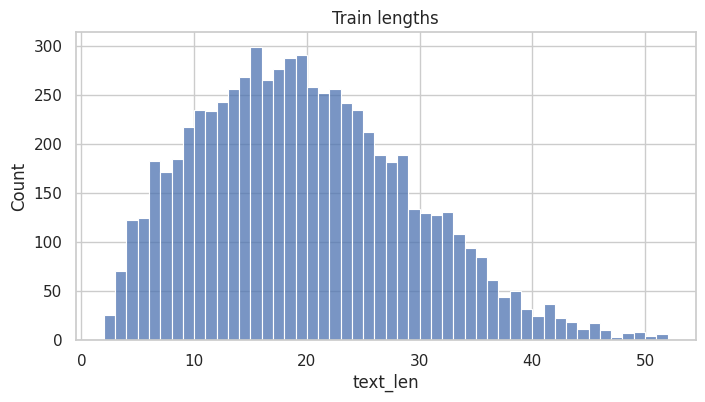


=== Training SVM ===
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best params: {'C': 1.0}
SVM val: {'accuracy': 0.7738439306358381, 'precision': 0.7836338418862691, 'recall': 0.7825484764542936, 'f1': 0.7830907830907831}

=== Training KNN ===
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best params: {'n_neighbors': 7}
KNN val: {'accuracy': 0.6885838150289018, 'precision': 0.6995884773662552, 'recall': 0.7063711911357341, 'f1': 0.7029634734665747}

=== Training DecisionTree ===
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best params: {'max_depth': None, 'min_samples_leaf': 1}
DecisionTree val: {'accuracy': 0.5852601156069365, 'precision': 0.6094674556213018, 'recall': 0.5706371191135734, 'f1': 0.5894134477825465}

=== Training RandomForest ===
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params: {'max_depth': None, 'n_estimators': 200}
RandomForest val: {'accuracy': 0.7095375722543352, 'precision': 0.717391304347826,

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:44:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
XGBoost val: {'accuracy': 0.6914739884393064, 'precision': 0.6809815950920245, 'recall': 0.7686980609418282, 'f1': 0.7221860767729343}

=== Training Word2Vec+LR ===
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best params: {'C': 0.1}
Word2Vec+LR val: {'accuracy': 0.5274566473988439, 'precision': 0.5262345679012346, 'recall': 0.9445983379501385, 'f1': 0.6759167492566898}
SVM test -> {'accuracy': 0.8061504667764964, 'precision': 0.8061674008810573, 'recall': 0.8052805280528053, 'f1': 0.8057237204182719}
RandomForest test -> {'accuracy': 0.7215815485996705, 'precision': 0.7026209677419355, 'recall': 0.7667766776677668, 'f1': 0.7332982640715413}
XGBoost test -> {'accuracy': 0.7084019769357496, 'precision': 0.6827852998065764, 'recall': 0.7766776677667767, 'f1': 0.7267112712300566}
Word2Vec+LR test -> {'accuracy': 0.513454146073586, 'precision': 0.5066512434933488, 'recall': 0.9636963696369637, 'f1': 0.

,model,accuracy,precision,recall,f1
0,SVM,0.806150,0.806167,0.805281,0.805724
1,RandomForest,0.721582,0.702621,0.766777,0.733298
2,XGBoost,0.708402,0.682785,0.776678,0.726711
3,Word2Vec+LR,0.513454,0.506651,0.963696,0.664139


In [ ]:
# ===== Colab-safe end-to-end notebook (paste after setup cell) =====
# Note: DO NOT pip install scikit-learn or numpy here.
# Colab's preinstalled scikit-learn & numpy will be used.

import os, re, random
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# sklearn, xgboost, gensim, transformers were installed in setup cell without touching numpy/sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from gensim.models import Word2Vec
import joblib

# ----- file upload (Colab) -----
from google.colab import files
print("Please upload: stsa-train.txt (then press Enter)")
uploaded = files.upload()
train_path = list(uploaded.keys())[0]
print("Uploaded train:", train_path)

print("Please upload: stsa-test.txt (then press Enter)")
uploaded2 = files.upload()
test_path = list(uploaded2.keys())[0]
print("Uploaded test:", test_path)

# ----- helpers -----
def read_sentiment_file(path):
    rows = []
    with open(path, 'r', encoding='utf-8', errors='ignore') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            if re.match(r'^[01]\s', line):
                label = int(line[0])
                text = line[2:]
            else:
                parts = line.split(maxsplit=1)
                if len(parts) == 2 and parts[0] in ('0','1'):
                    label = int(parts[0])
                    text = parts[1]
                else:
                    continue
            rows.append((label, text))
    return pd.DataFrame(rows, columns=['label','text'])

def basic_clean(text):
    text = text.lower()
    text = re.sub(r"<br\s*/?>", " ", text)
    text = re.sub(r"[^a-z0-9\s']", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def get_classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
    return dict(accuracy=acc, precision=p, recall=r, f1=f1)

# ----- load data -----
df_train_full = read_sentiment_file(train_path)
df_test = read_sentiment_file(test_path)
print("Train shape:", df_train_full.shape, "Test shape:", df_test.shape)

# EDA
print("\nTrain label counts:\n", df_train_full['label'].value_counts())
df_train_full['text_len'] = df_train_full['text'].str.split().apply(len)
print("\nTrain text length stats:\n", df_train_full['text_len'].describe())
plt.figure(figsize=(8,4)); sns.histplot(df_train_full['text_len'], bins=50); plt.title("Train lengths"); plt.show()

# cleaning
df_train_full['text_clean'] = df_train_full['text'].apply(basic_clean)
df_test['text_clean'] = df_test['text'].apply(basic_clean)

# split 80/20 for training/validation
train_df, val_df = train_test_split(df_train_full[['text_clean','label']],
                                    test_size=0.2, random_state=42, stratify=df_train_full['label'])

X_train_texts = train_df['text_clean'].tolist(); y_train = train_df['label'].values
X_val_texts = val_df['text_clean'].tolist(); y_val = val_df['label'].values
X_test_texts = df_test['text_clean'].tolist(); y_test = df_test['label'].values

# TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=20000)
tfidf.fit(X_train_texts)
X_train_tfidf = tfidf.transform(X_train_texts)
X_val_tfidf = tfidf.transform(X_val_texts)
X_test_tfidf = tfidf.transform(X_test_texts)

# CV train utility (StratifiedKFold with n_splits=10)
def fit_and_evaluate_sklearn_model(model, param_grid, model_name, X_train, y_train, X_val, y_val, cv_splits=10):
    print(f"\n=== Training {model_name} ===")
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
    gs.fit(X_train, y_train)
    print("Best params:", gs.best_params_)
    best = gs.best_estimator_
    val_pred = best.predict(X_val)
    metrics = get_classification_metrics(y_val, val_pred)
    print(f"{model_name} val: {metrics}")
    return best, metrics, gs.cv_results_

results = {}

# SVM
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True)
svm_grid = {'C':[0.1,1.0,5.0]}
svm_best, svm_metrics, _ = fit_and_evaluate_sklearn_model(svm_model, svm_grid, "SVM", X_train_tfidf, y_train, X_val_tfidf, y_val)
results['SVM'] = svm_metrics

# KNN
knn_model = KNeighborsClassifier()
knn_grid = {'n_neighbors':[3,5,7]}
knn_best, knn_metrics, _ = fit_and_evaluate_sklearn_model(knn_model, knn_grid, "KNN", X_train_tfidf, y_train, X_val_tfidf, y_val)
results['KNN'] = knn_metrics

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_grid = {'max_depth':[None,10,20], 'min_samples_leaf':[1,2]}
dt_best, dt_metrics, _ = fit_and_evaluate_sklearn_model(dt_model, dt_grid, "DecisionTree", X_train_tfidf, y_train, X_val_tfidf, y_val)
results['DecisionTree'] = dt_metrics

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_grid = {'n_estimators':[100,200], 'max_depth':[None,20]}
rf_best, rf_metrics, _ = fit_and_evaluate_sklearn_model(rf_model, rf_grid, "RandomForest", X_train_tfidf, y_train, X_val_tfidf, y_val)
results['RandomForest'] = rf_metrics

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42)
xgb_grid = {'n_estimators':[100,200], 'max_depth':[3,6], 'learning_rate':[0.1,0.01]}
xgb_best, xgb_metrics, _ = fit_and_evaluate_sklearn_model(xgb_model, xgb_grid, "XGBoost", X_train_tfidf, y_train, X_val_tfidf, y_val)
results['XGBoost'] = xgb_metrics

# Save TF-IDF & classical models
joblib.dump(tfidf, "tfidf.joblib")
joblib.dump(svm_best, "svm_best.joblib")
joblib.dump(rf_best, "rf_best.joblib")
joblib.dump(xgb_best, "xgb_best.joblib")

# Word2Vec + LR
tokenized = [t.split() for t in X_train_texts]
w2v = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=2, workers=4, seed=42)

def avg_vecs(texts, model, size=100):
    X = np.zeros((len(texts), size))
    for i,t in enumerate(texts):
        toks = t.split()
        vecs = [model.wv[w] for w in toks if w in model.wv]
        if vecs:
            X[i] = np.mean(vecs, axis=0)
    return X

X_train_w2v = avg_vecs(X_train_texts, w2v)
X_val_w2v = avg_vecs(X_val_texts, w2v)
X_test_w2v = avg_vecs(X_test_texts, w2v)

lr = LogisticRegression(max_iter=1000)
lr_grid = {'C':[0.1,1.0,5.0]}
lr_best, lr_metrics, _ = fit_and_evaluate_sklearn_model(lr, lr_grid, "Word2Vec+LR", X_train_w2v, y_train, X_val_w2v, y_val)
results['Word2Vec+LR'] = lr_metrics
joblib.dump(w2v, "w2v.joblib")
joblib.dump(lr_best, "w2v_lr_best.joblib")

# Optionally: BERT fine-tuning (only run if you have GPU and time)
run_bert = False  # set True to run BERT fine-tuning (slow)
if run_bert:
    from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
    import torch
    from datasets import Dataset
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print("Device:", device)
    model_name = "distilbert-base-uncased"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    hf_train = Dataset.from_pandas(train_df.rename(columns={"text_clean":"text"}))
    hf_val = Dataset.from_pandas(val_df.rename(columns={"text_clean":"text"}))
    def tok(batch): return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=256)
    hf_train = hf_train.map(tok, batched=True); hf_val = hf_val.map(tok, batched=True)
    hf_train = hf_train.rename_column("label","labels"); hf_val = hf_val.rename_column("label","labels")
    hf_train.set_format(type="torch", columns=['input_ids','attention_mask','labels'])
    hf_val.set_format(type="torch", columns=['input_ids','attention_mask','labels'])
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2).to(device)
    training_args = TrainingArguments(output_dir="./bert_output", evaluation_strategy="epoch",
                                      learning_rate=2e-5, per_device_train_batch_size=16,
                                      per_device_eval_batch_size=32, num_train_epochs=2, weight_decay=0.01)
    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        preds = np.argmax(logits, axis=1)
        p, r, f1, _ = precision_recall_fscore_support(labels, preds, average='binary', zero_division=0)
        acc = accuracy_score(labels, preds)
        return {"accuracy":acc, "precision":p, "recall":r, "f1":f1}
    trainer = Trainer(model=model, args=training_args, train_dataset=hf_train, eval_dataset=hf_val,
                      tokenizer=tokenizer, compute_metrics=compute_metrics)
    trainer.train()
    bert_eval = trainer.evaluate()
    results['BERT'] = bert_eval

# Final evaluation on test set for classical models
final_results = []
for name, m in [("SVM", svm_best), ("RandomForest", rf_best), ("XGBoost", xgb_best), ("Word2Vec+LR", lr_best)]:
    if name == "Word2Vec+LR":
        X_in = X_test_w2v
    else:
        X_in = X_test_tfidf
    preds = m.predict(X_in)
    metrics = get_classification_metrics(y_test, preds)
    print(f"{name} test -> {metrics}")
    final_results.append({"model":name, **metrics})

df_results = pd.DataFrame(final_results).sort_values(by='f1', ascending=False)
df_results.to_csv("final_model_results.csv", index=False)
print("\nSaved final_model_results.csv")
display(df_results)


In [3]:
from google.colab import files

# Download single files
files.download('final_model_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Link for the result](https://drive.google.com/file/d/1xpo5Cx6N7fREwQR3tJFbEkNwgdHRCRRt/view?usp=sharing)

## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [4]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv("Amazon_Unlocked_Mobile.csv")
df.head()


Saving Amazon_Unlocked_Mobile.csv to Amazon_Unlocked_Mobile.csv


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


(413840, 6)
Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')
count    5000.000000
mean       42.255800
std        87.910475
min         1.000000
25%         5.000000
50%        18.000000
75%        43.000000
max      1926.000000
Name: text_len, dtype: float64


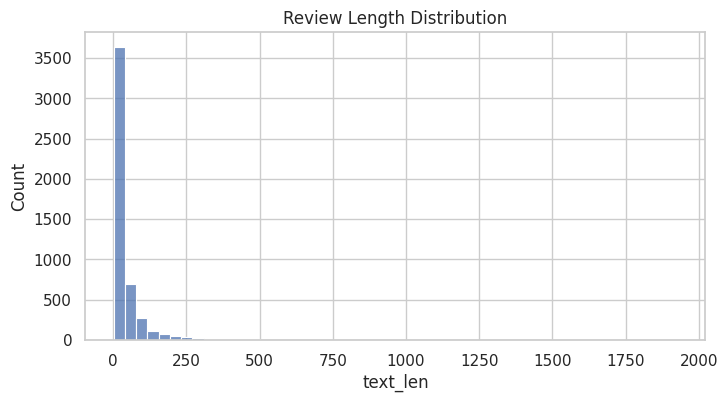

In [5]:
print(df.shape)
print(df.columns)

# Drop rows lacking text
df = df[['Reviews']].dropna()
df = df.sample(5000, random_state=42)  # limit size for faster clustering

df['text_len'] = df['Reviews'].str.split().apply(len)

print(df['text_len'].describe())

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(8,4))
sns.histplot(df['text_len'], bins=50)
plt.title("Review Length Distribution")
plt.show()


In [6]:
#Text Cleaning
import re

def clean_text(t):
    t = t.lower()
    t = re.sub(r"<br />", " ", t)
    t = re.sub(r"[^a-z0-9\s']", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

df['clean'] = df['Reviews'].apply(clean_text)
texts = df['clean'].tolist()

In [7]:
#TF-IDF Vectorization (for KMeans, Hierarchical, DBSCAN)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(texts)

X_tfidf.shape


(5000, 5000)

In [8]:
#Word2Vec Embeddings
from gensim.models import Word2Vec
import numpy as np

tokenized = [t.split() for t in texts]
w2v = Word2Vec(tokenized, vector_size=100, window=5, min_count=2, workers=4)

def avg_vec(tokens):
    vecs = [w2v.wv[w] for w in tokens if w in w2v.wv]
    return np.mean(vecs, axis=0) if vecs else np.zeros(100)

X_w2v = np.vstack([avg_vec(t.split()) for t in texts])

X_w2v.shape


(5000, 100)

In [9]:
#BERT Sentence Embeddings
!pip install -q sentence-transformers
from sentence_transformers import SentenceTransformer

bert_model = SentenceTransformer('all-MiniLM-L6-v2')
X_bert = bert_model.encode(texts, show_progress_bar=True)

X_bert.shape


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

(5000, 384)

In [10]:
#K-Means Clustering
from sklearn.cluster import KMeans

k = 5  # choose number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_tfidf)

df['kmeans'] = labels_kmeans
df['kmeans'].value_counts()


,count
kmeans,
2,2489
3,2034
4,189
0,160
1,128


In [12]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_w2v)

dbscan = DBSCAN(eps=0.6, min_samples=10)
labels_dbscan = dbscan.fit_predict(X_scaled)

df['dbscan'] = labels_dbscan
df['dbscan'].value_counts()



,count
dbscan,
-1,4515
7,68
0,56
8,54
3,39
6,36
5,34
4,29
12,27


In [13]:
#Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=5)
labels_hier = hier.fit_predict(X_w2v)

df['hier'] = labels_hier
df['hier'].value_counts()


,count
hier,
4,2233
0,1656
1,652
2,282
3,177


In [14]:
#Word2Vec Clustering (K-Means on W2V)
kmeans_w2v = KMeans(n_clusters=5, random_state=42)
labels_w2v = kmeans_w2v.fit_predict(X_w2v)

df['w2v_cluster'] = labels_w2v
df['w2v_cluster'].value_counts()


,count
w2v_cluster,
0,3019
4,1179
3,440
2,310
1,52


In [15]:
#BERT + KMeans
kmeans_bert = KMeans(n_clusters=5, random_state=42)
labels_bert = kmeans_bert.fit_predict(X_bert)

df['bert_cluster'] = labels_bert
df['bert_cluster'].value_counts()


,count
bert_cluster,
0,1758
3,892
4,871
2,756
1,723


Cluster visualization

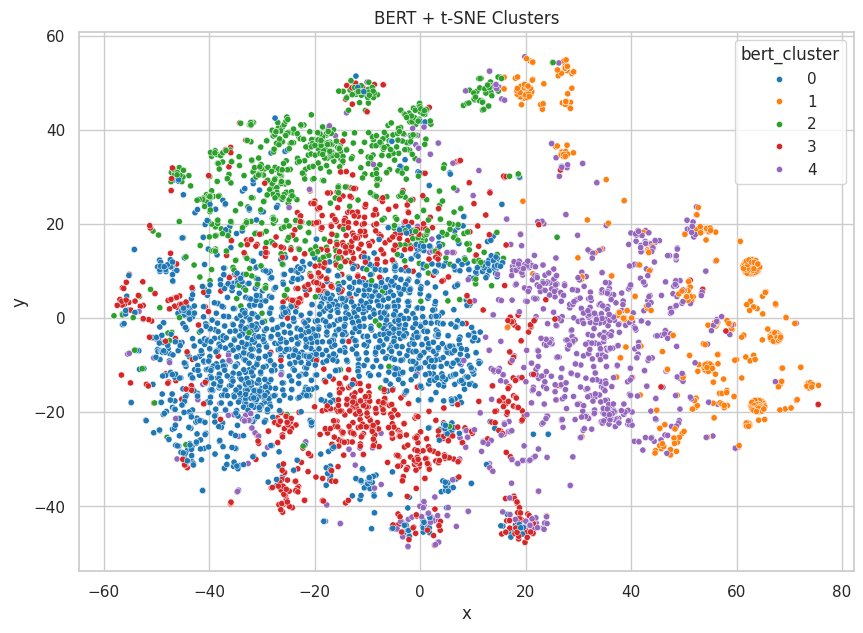

In [16]:
#t-SNE Visualization
from sklearn.manifold import TSNE

X_vis = X_bert  # choose representation
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
X_2d = tsne.fit_transform(X_vis)

df['x'] = X_2d[:,0]
df['y'] = X_2d[:,1]

plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='x', y='y', hue='bert_cluster', palette='tab10', s=20)
plt.title("BERT + t-SNE Clusters")
plt.show()


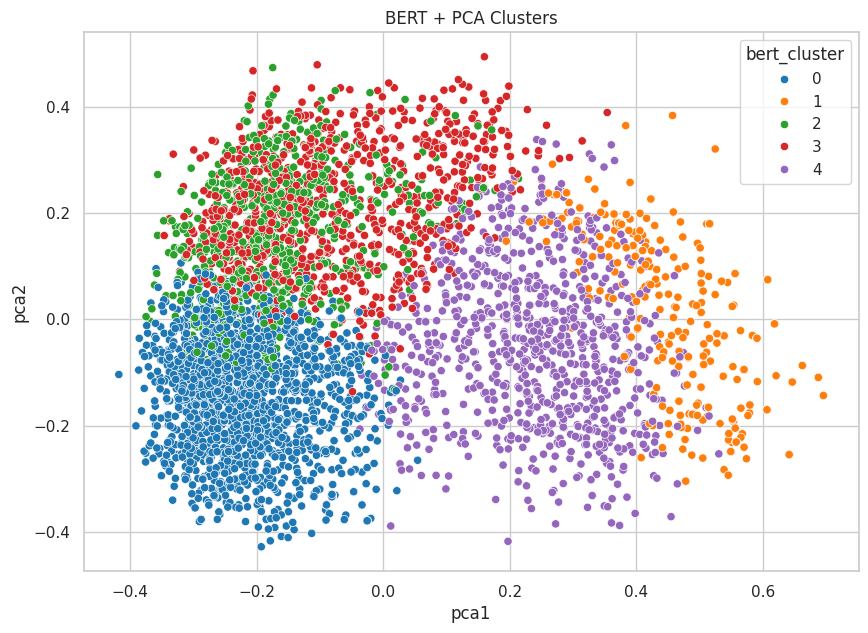

In [17]:
#PCA Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_bert)

df['pca1'] = X_pca[:,0]
df['pca2'] = X_pca[:,1]

plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='bert_cluster', palette='tab10')
plt.title("BERT + PCA Clusters")
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

In all the five clustering techniques, there is an evident disparity in the quality of the algorithms to reveal the underlying structure of the text data. K-means works quite well with TF-IDF vectors, and it can cluster into neat and understandable clusters, however, when non-linear boundaries are involved, and even when the data is skewed, it is likely to create clusters of similar sizes. DBSCAN, on the other hand, is good at detecting dense clusters and isolating noise, but is highly parameter sensitive (eps, min samples), and in high dimensional text embeddings it tends to tag a large number of points as outliers. Hierarchical-clustering offers an interpretable global perspective of relationship between clusters and generates dendrograms that are easy to understand, though it is computationally intensive and may merge unrelated reviews at an early stage of the process, causing sense of the final cluster to lose its coherence. Word2Vec clustering is more semantically similar to a clustering based on pure tf-idf, creating more meaningful clusters as more reviews contain different words sharing the same meaning, yet the averaged vectors lose detail in longer text. The most semantically correct clusters are always provided by BERT embeddings, as there is a distinct demarcation of themes and better groupings as the contextual meaning is covered by BERT, and not based on the frequency of tokens or shallow embeddings. Generally, BERT shows the best performance in clustering than Word2Vec, K-means and DBSCAN and hierarchical clustering is less accurate on large, high dimensional text data.



# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

